# Make figures

In [2]:
import pandas as pd
import osmnx as ox
import networkx as nx
import math
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [51]:
filepath="../graph/rotterdam_drive_bbox_cameras.graphml"
graph_test=ox.load_graphml(filepath)

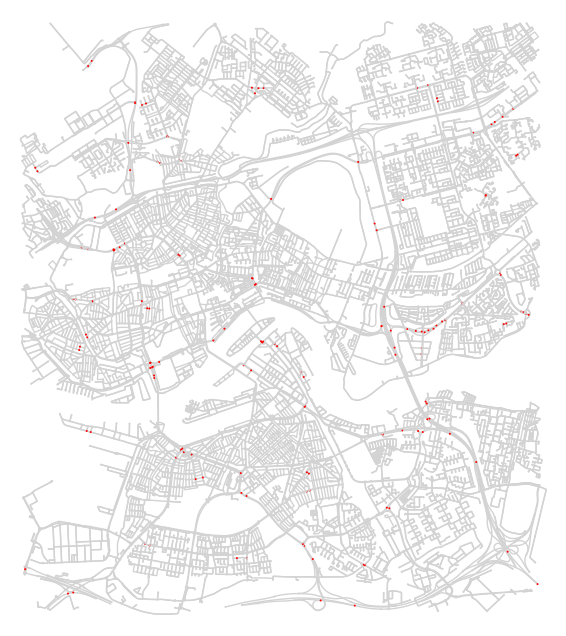

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
node_color = []
for u, data in graph_test.nodes(data=True):
    if "camera" in data:
        node_color.append("red")
    else:
        node_color.append("lightgray")


# img = plt.imread("map_rotterdam.jpg")
# ax.imshow(img)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color=node_color, node_size=2, edge_linewidth=1, edge_color='lightgray',
                save=True, filepath="cameras.png"
            )

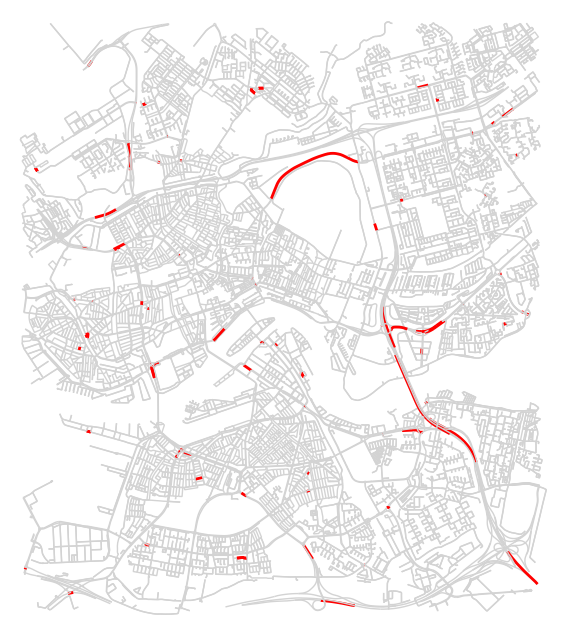

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [61]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
node_color = []
for u, edge, data in graph_test.edges(data=True):
    if "camera" in data:
        edge_size.append("red")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)


# img = plt.imread("map_rotterdam.jpg")
# ax.imshow(img)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="cameras.png"
            )


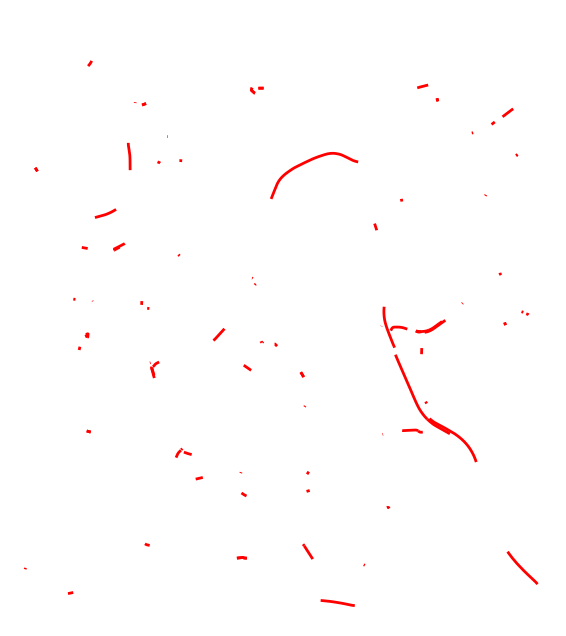

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [62]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
node_color = []
for u, edge, data in graph_test.edges(data=True):
    if "camera" in data:
        edge_size.append("red")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(0)


# img = plt.imread("map_rotterdam.jpg")
# ax.imshow(img)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="cameras+bg.png"
            )

In [54]:
filepath="../graph/rotterdam_drive_basic.graphml"
graph=ox.load_graphml(filepath)

In [55]:
for index, row in df_fixed.iterrows():
    if row['Latitude'] < 51.863171 or row['Latitude'] > 51.970486 :
        df_fixed = df_fixed.drop(index)
    elif row['Longitude'] < 4.427773  or row['Longitude'] > 4.580918:
        df_fixed = df_fixed.drop(index)
        

In [57]:
counter = 1
for index, row in df_fixed.iterrows():
    graph_test.add_node(counter, pos=(row['Latitude'], row['Longitude']), camera_loc=True)


In [59]:
nodes_with_camera = 0
for u, data in graph.nodes(data=True):
    if 'camera_loc' in data:
        nodes_with_camera =  nodes_with_camera + 1

In [60]:
nodes_with_camera

0

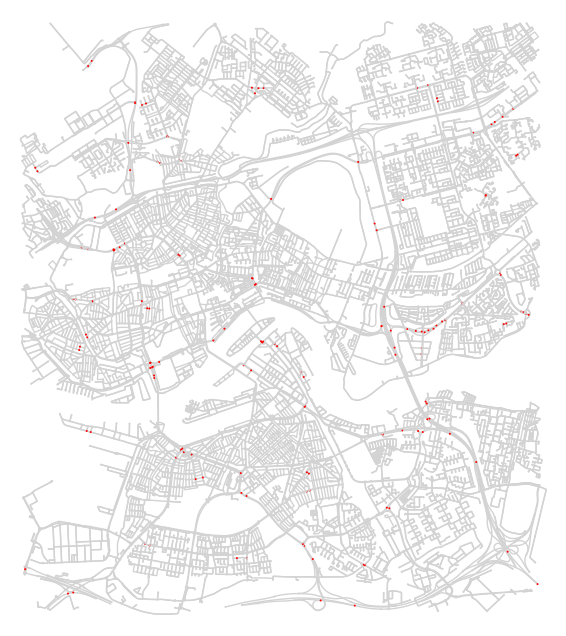

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [58]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
node_color = []
for u, data in graph_test.nodes(data=True):
    if "camera_loc" in data:
        node_color.append("black")
    elif "camera" in data:
        node_color.append("red")
    else:
        node_color.append("lightgray")


# img = plt.imread("map_rotterdam.jpg")
# ax.imshow(img)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color=node_color, node_size=2, edge_linewidth=1, edge_color='lightgray',
                save=True, filepath="cameras.png"
            )

In [5]:
df_fixed= pd.read_excel('../data/cameras/camer_data_fixed.xlsx')   

In [7]:
df_fixed.columns

Index(['Locatienaam', 'Eenheid', 'Plaats', 'Gemeente', 'Latitude',
       'Longitude'],
      dtype='object')

In [16]:
row = df_fixed.iloc[0]

closest_node_1 = None
closest_node_2 = None
closest_distance = math.inf 

for node, data_node in graph_test.nodes(data=True):
    for node_num in graph_test.neighbors(node):
        p1 = np.asarray((data_node['y'], data_node['x']))
        p2 = np.asarray((graph_test.nodes[node_num]['y'], graph_test.nodes[node_num]['x']))
        p3 = np.asarray((row['Latitude'], row['Longitude']))

        distance = LA.norm(np.cross(p2-p1, p1-p3))/LA.norm(p2-p1)

        if distance < closest_distance:
            closest_distance = distance
            closest_node_1 = node
            closest_node_2 = node_num
                
print(closest_distance)

C:\Users\Willemijn Tutuarima\AppData\Local\Temp\ipykernel_12544\290585721.py:13: RuntimeWarning: invalid value encountered in double_scalars
  distance = LA.norm(np.cross(p2-p1, p1-p3))/LA.norm(p2-p1)


1.3536067943605545e-06


In [11]:
#delete the cameras that are outside the bounding box
for index, row in df_fixed.iterrows():
    if row['Latitude'] < 51.863171 and row['Latitude'] > 51.970486 :
        df_fixed = df_fixed.drop(index)
    elif row['Longitude'] < 4.427773  and row['Longitude'] > 4.580918:
        df_fixed = df_fixed.drop(index)
   

In [32]:
for index, row in df_fixed.iterrows():
    if row['Latitude'] < 51.863171 or row['Latitude'] > 51.970486 :
        df_fixed = df_fixed.drop(index)
    elif row['Longitude'] < 4.427773 or row['Longitude'] > 4.580918:
        df_fixed = df_fixed.drop(index)
        

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


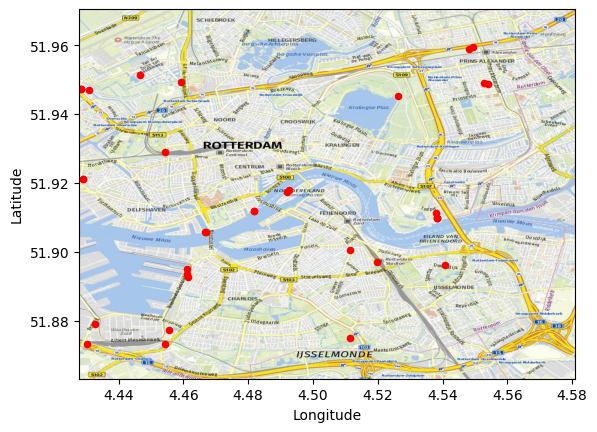

In [36]:
img = plt.imread("map_rotterdam.jpg")
fig, ax = plt.subplots(frameon=False)
ax.imshow(img, extent=[4.427773, 4.580918, 51.863171, 51.970486], aspect='auto')
df_fixed.plot.scatter(y="Latitude", x="Longitude", c='red', ax=ax)
fig.savefig('cameras_bg.jpg')

## Obstacles

In [15]:
counter=0
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "roundabout" in data:
        counter +=1
print(counter)

0


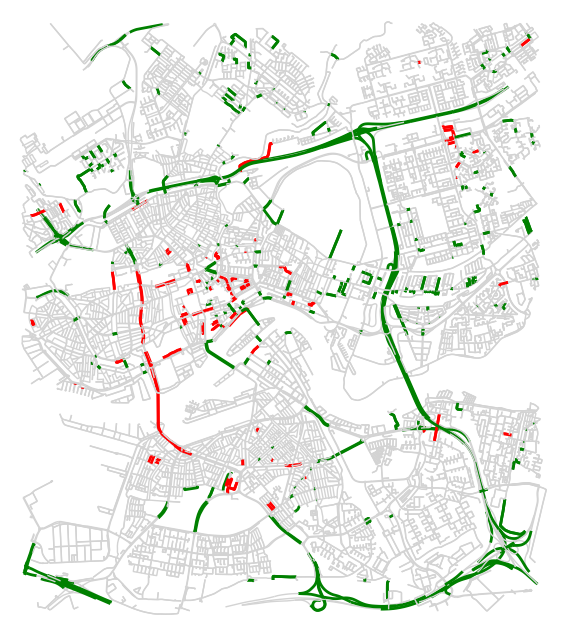

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "tunnel" in data:
        edge_size.append("red")
        edge_width.append(2)
    elif "roundabout" in data:
        edge_size.append("blue")
        edge_width.append(2)
    elif "bridge" in data:
        edge_size.append("green")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)


# 
#     isinstance(data.get("tunnel"), bool) or isinstance(data.get("roundabout"), bool) or isinstance(
#                     data.get("bridge"), bool) or isinstance(data.get("traffic_light"), bool):
# img = plt.imread("map_rotterdam.jpg")
# ax.imshow(img)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="obstacles.png"
            )

## Traffic lights

In [66]:
filepath="../graph/rotterdam_drive_bbox_cameras_and_traffic_lights.graphml"
graph_test=ox.load_graphml(filepath)

In [67]:
counter=0
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "traffic_light" in data:
        counter +=1
print(counter)

1781


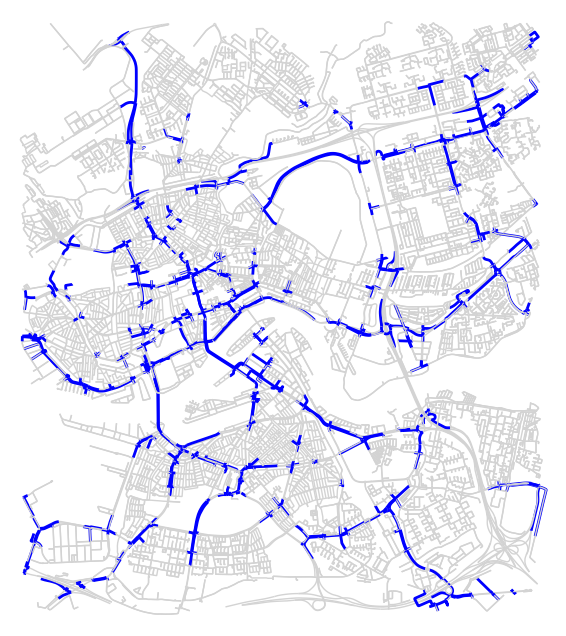

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [69]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "traffic_light" in data:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="traffic_lights.png"
            )

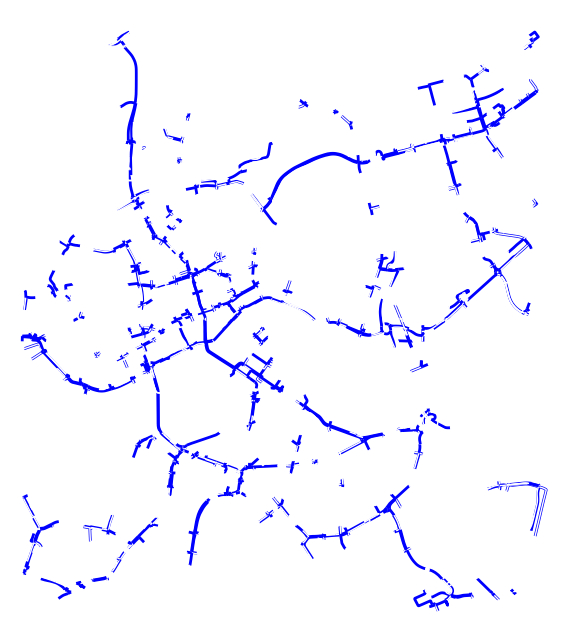

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [70]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "traffic_light" in data:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("white")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="traffic_lights_bg.png"
            )

## Bridges

In [71]:
filepath="../graph/rotterdam_drive_bbox_cameras_traffic_lights_bridges.graphml"
graph_test=ox.load_graphml(filepath)

In [73]:
counter=0
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "bridge" in data:
        counter +=1
print(counter)

595


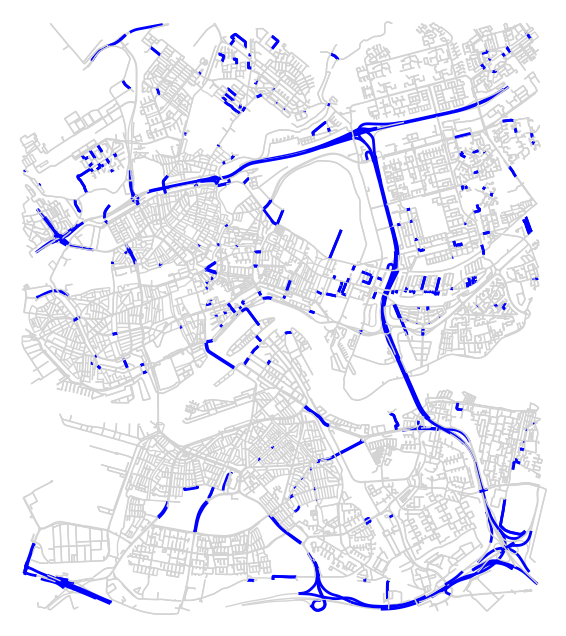

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [74]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "bridge" in data:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="bridges.png"
            )

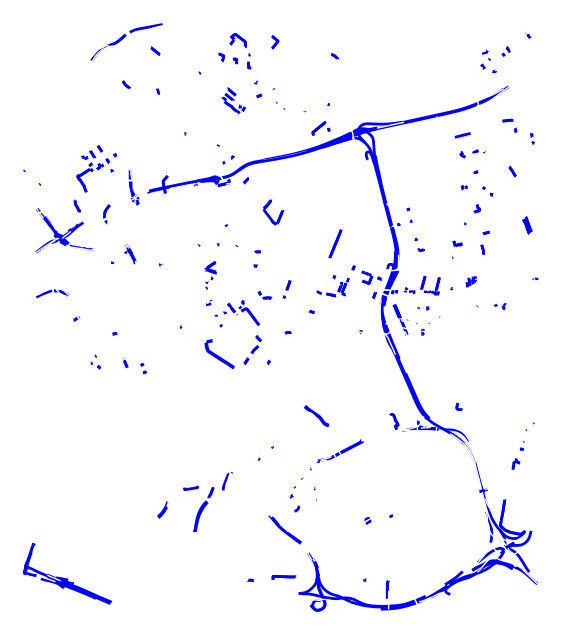

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [75]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "bridge" in data:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("white")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="bridges_bg.png"
            )

## roundabouts

In [80]:
filepath="../graph/rotterdam_drive_bbox_cameras_traffic_lights_bridges_roundabouts.graphml"
graph_test=ox.load_graphml(filepath)

In [81]:
counter=0
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "roundabout" in data:
        counter +=1
print(counter)

636


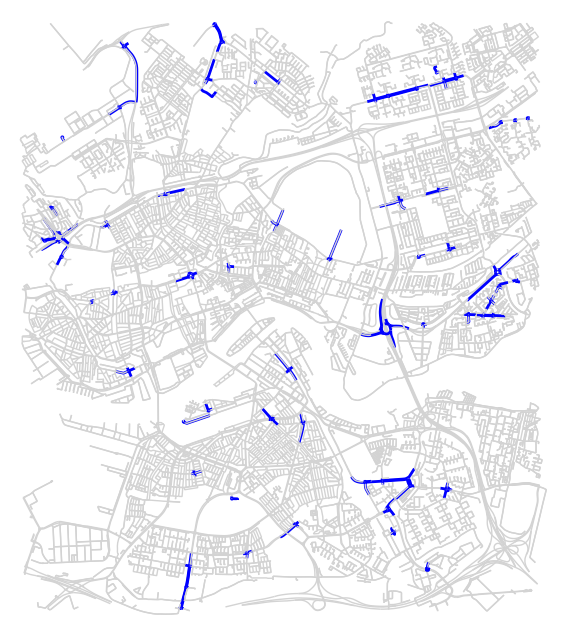

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [82]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "roundabout" in data:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="roundabouts.png"
            )

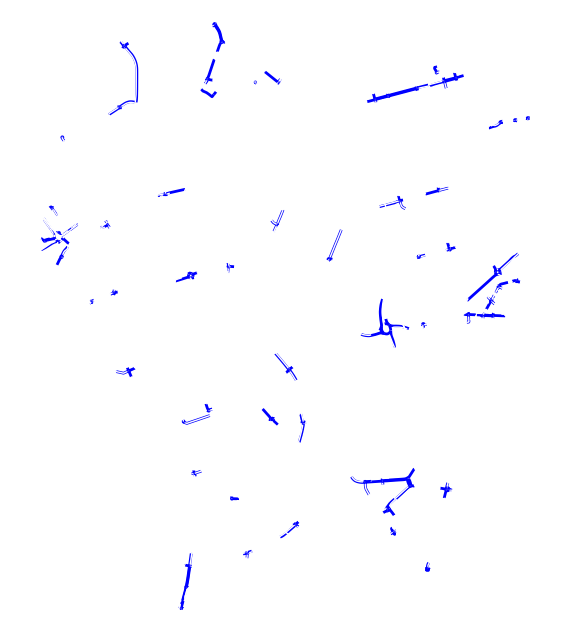

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [84]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "roundabout" in data:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("white")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="roundabouts_bg.png"
            )

## Tunnels

In [3]:
filepath="../../graph/rotterdam_drive_bbox_cameras_traffic_lights_bridges_roundabouts_tunnels.graphml"
graph_test=ox.load_graphml(filepath)

In [86]:
counter=0
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "tunnel" in data:
        counter +=1
print(counter)

175


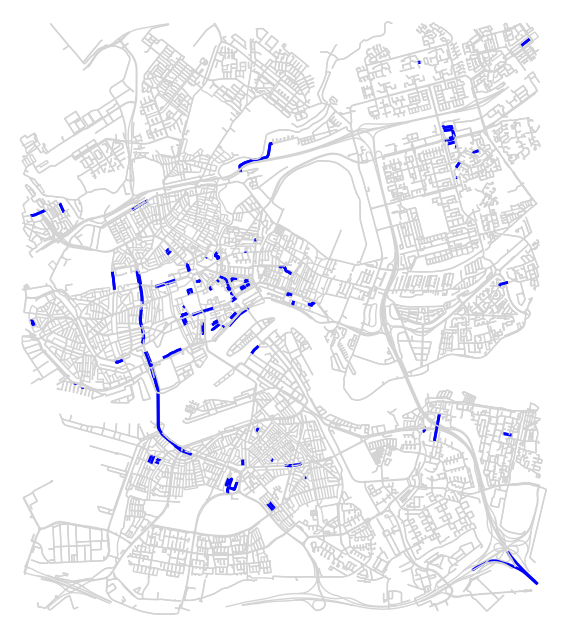

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [89]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "tunnel" in data:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="tunnel.png"
            )

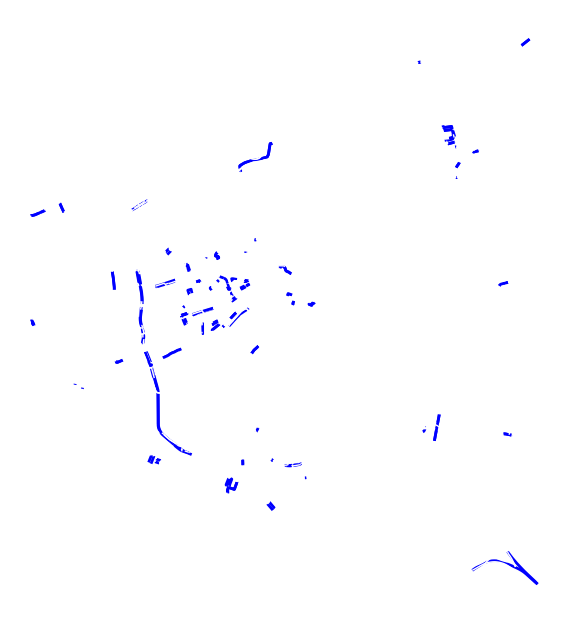

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [90]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "tunnel" in data:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("white")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="tunnel_bg.png"
            )

# short paths

In [95]:
counter = 0
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["length"] < 30:
        counter +=1
    

In [96]:
counter

5692

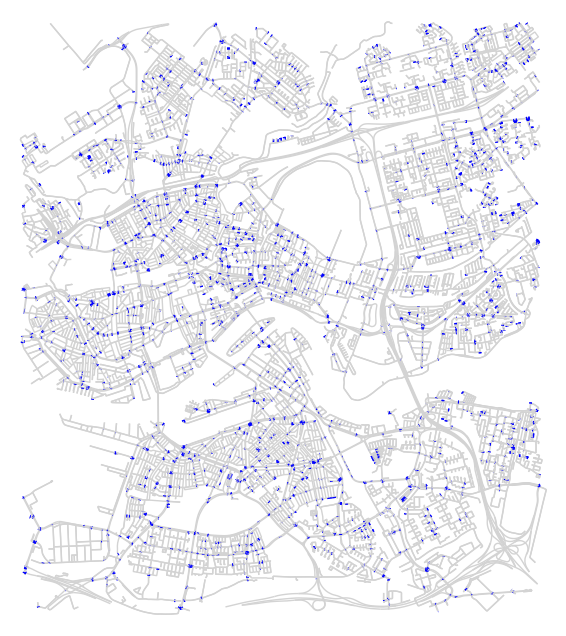

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [99]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["length"] < 30:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="short_paths.png"
            )

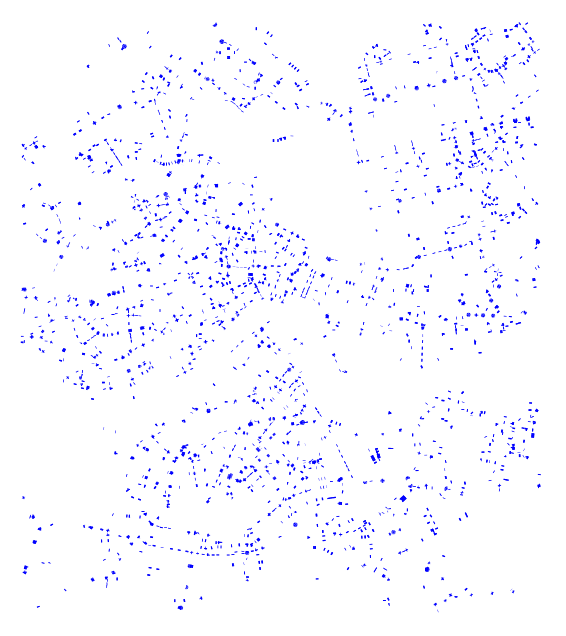

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [100]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["length"] < 30:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("white")
        edge_width.append(0)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="short_paths_bg.png"
            )

# roads with >50 km/h

In [107]:
counter = 0
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):

    if isinstance(data.get('maxspeed'), list):
        if  float(data.get('maxspeed')[0]) > 50:
            counter +=1

    elif isinstance(data.get('maxspeed'), str):
        if float(data.get('maxspeed')) > 50:
            counter +=1

In [108]:
counter

430

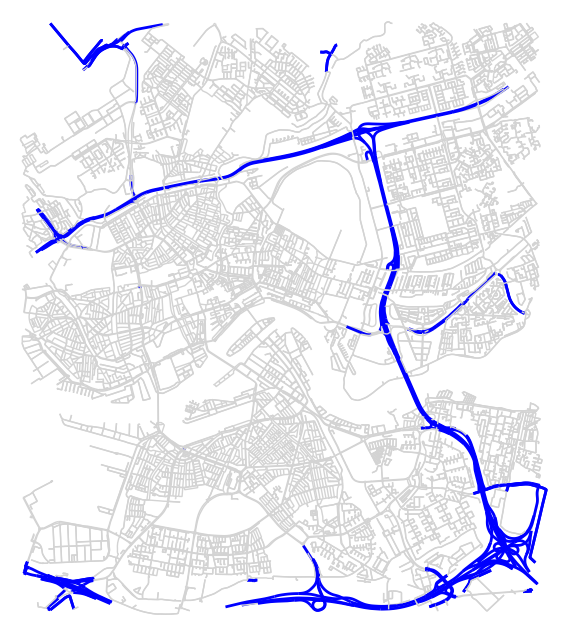

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [110]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if isinstance(data.get('maxspeed'), list):
        if  float(data.get('maxspeed')[0]) > 50:
            edge_size.append("blue")
            edge_width.append(2)
        else:
            edge_size.append("lightgray")
            edge_width.append(1)
            
    elif isinstance(data.get('maxspeed'), str):
        if float(data.get('maxspeed')) > 50:
            edge_size.append("blue")
            edge_width.append(2)
        else:
            edge_size.append("lightgray")
            edge_width.append(1)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="high_speed.png"
            )

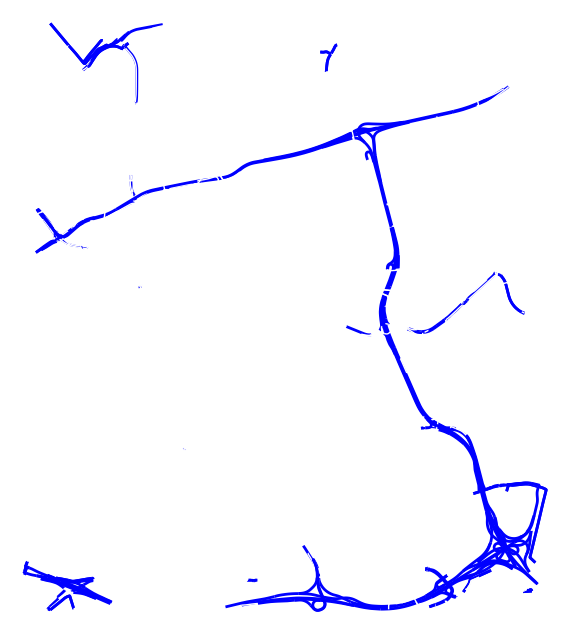

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [111]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if isinstance(data.get('maxspeed'), list):
        if  float(data.get('maxspeed')[0]) > 50:
            edge_size.append("blue")
            edge_width.append(2)
        else:
            edge_size.append("white")
            edge_width.append(1)
            
    elif isinstance(data.get('maxspeed'), str):
        if float(data.get('maxspeed')) > 50:
            edge_size.append("blue")
            edge_width.append(2)
        else:
            edge_size.append("white")
            edge_width.append(1)
    else:
        edge_size.append("white")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="high_speed_bg.png"
            )

# one way roads

In [112]:
counter = 0
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["oneway"]:
        counter +=1
    

In [113]:
counter

7556

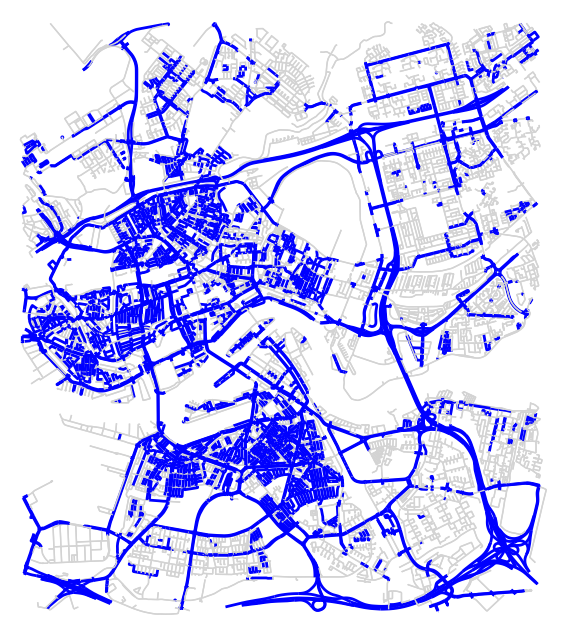

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [114]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["oneway"]:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="oneway.png"
            )

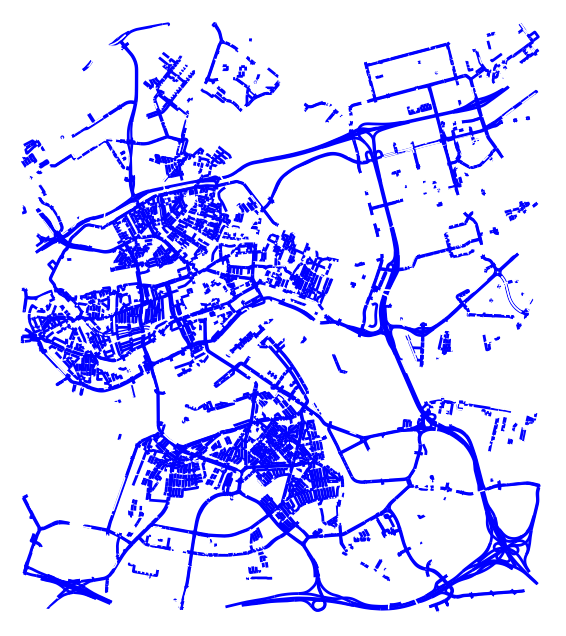

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [115]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["oneway"]:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("white")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="oneway_bg.png"
            )

# number of lanes

In [4]:
counter = 0
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "lanes" in data and int(data["lanes"][0]) > 1:
        counter +=1
    

In [5]:
counter

2509

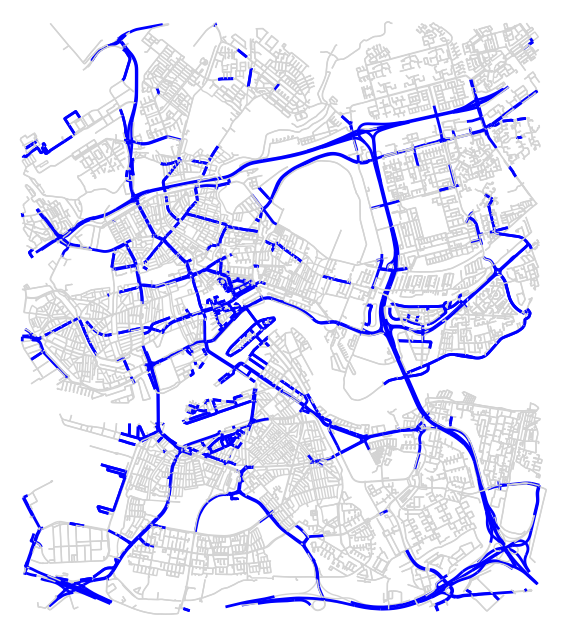

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "lanes" in data and int(data["lanes"][0]) > 1:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="lanes.png"
            )

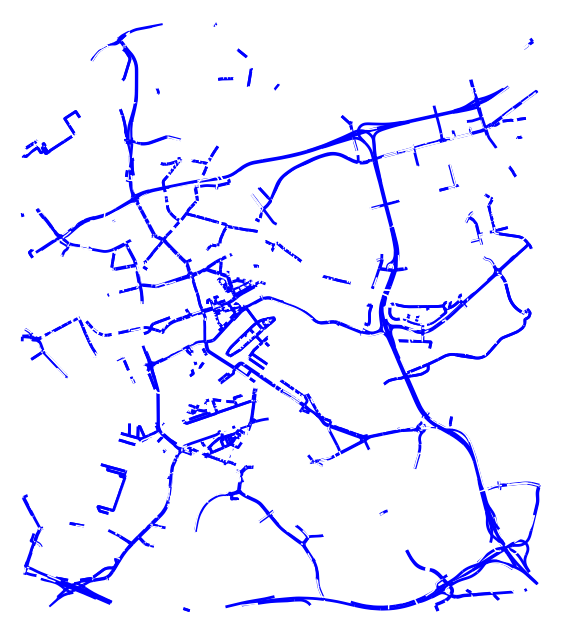

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [122]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if "lanes" in data and int(data["lanes"][0]) > 1:
        edge_size.append("blue")
        edge_width.append(2)
    else:
        edge_size.append("white")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="lanes_bg.png"
            )

# road categories

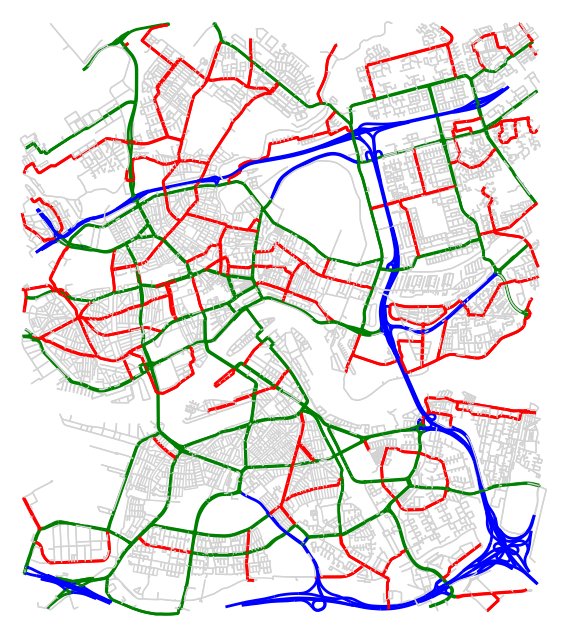

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [123]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["highway"] in ['motorway', 'motorway_link', 'trunk']:
        edge_size.append("blue")
        edge_width.append(2)
    elif data["highway"] in ['primary', 'primary_link', 'secondary']:
        edge_size.append("green")
        edge_width.append(2)
    elif data["highway"] in ['tertiary']:
        edge_size.append("red")
        edge_width.append(2)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="categories.png"
            )

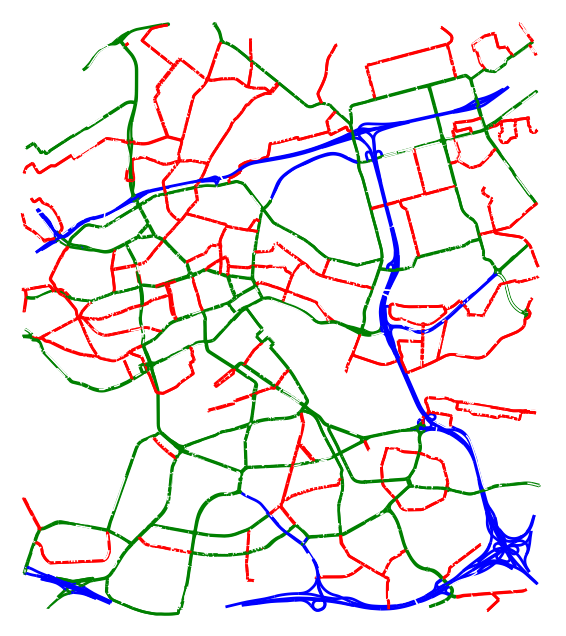

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [124]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["highway"] in ['motorway', 'motorway_link', 'trunk']:
        edge_size.append("blue")
        edge_width.append(2)
    elif data["highway"] in ['primary', 'primary_link', 'secondary']:
        edge_size.append("green")
        edge_width.append(2)
    elif data["highway"] in ['tertiary']:
        edge_size.append("red")
        edge_width.append(2)
    else:
        edge_size.append("white")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="categories_bg.png"
            )

In [11]:
TA_1_count = 0
TA_1_length = 0
TA_2_count = 0
TA_2_length = 0
TA_3_length = 0
TA_3_count = 0

In [12]:
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["highway"] in ['motorway', 'motorway_link', 'trunk']:
        TA_1_count += 1
        TA_1_length += data['length']
    elif data["highway"] in ['primary', 'primary_link', 'secondary']:
        TA_2_count += 1
        TA_2_length += data['length']
    elif data["highway"] in ['tertiary']:
        TA_3_count += 1
        TA_3_length += data['length']

In [13]:
print(TA_1_count)
print(TA_1_length)
print(TA_2_count)
print(TA_2_length)
print(TA_3_count)
print(TA_3_length)

257
144257.58199999994
2296
263682.01200000034
2842
244750.65400000004


In [19]:
TA_1_maxspeed = []
TA_2_maxspeed = []
TA_3_maxspeed = []
TA_1_undefined =0
TA_2_undefined =0
TA_3_undefined =0


In [20]:
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if data["highway"] in ['motorway', 'motorway_link', 'trunk']:
        if 'maxspeed' in data:
            TA_1_maxspeed.append(data['maxspeed'])
        else:
            TA_1_undefined +=1
    elif data["highway"] in ['primary', 'primary_link', 'secondary']:
        if 'maxspeed' in data:
            TA_2_maxspeed.append(data['maxspeed'])
        else:
            TA_2_undefined +=1
    elif data["highway"] in ['tertiary']:
        if 'maxspeed' in data:
            TA_3_maxspeed.append(data['maxspeed'])
        else:
            TA_3_undefined +=1

In [21]:
print(TA_1_undefined)
print(TA_2_undefined)
print(TA_3_undefined)

2
9
240


In [35]:
print(TA_1_maxspeed[0:5])

['100', '100', '100', '100', '100']


In [37]:
pd.Series(TA_1_maxspeed).value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


100               120
50                 45
80                 30
70                 18
[50, 70]           11
[50, 100]           5
[100, 80]           5
[50, 130]           5
[50, 80]            3
[50, 100, 130]      2
[100, 70]           2
[70, 90]            1
[80, 70, 90]        1
[100, 90]           1
[100, 130]          1
[50, 100, 80]       1
[50, 80, 100]       1
[80, 100]           1
130                 1
30                  1
dtype: int64

In [38]:
pd.Series(TA_2_maxspeed).value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


50              2112
80               113
[50, 80]          17
30                16
70                14
[50, 70]           5
60                 3
[80, 70]           3
[50, 60]           2
[50, 80, 70]       2
dtype: int64

In [39]:
pd.Series(TA_3_maxspeed).value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


50          2318
30           229
[30, 50]      18
[50, 30]      17
60             6
80             6
[50, 80]       4
[30, 60]       2
[50, 60]       2
dtype: int64

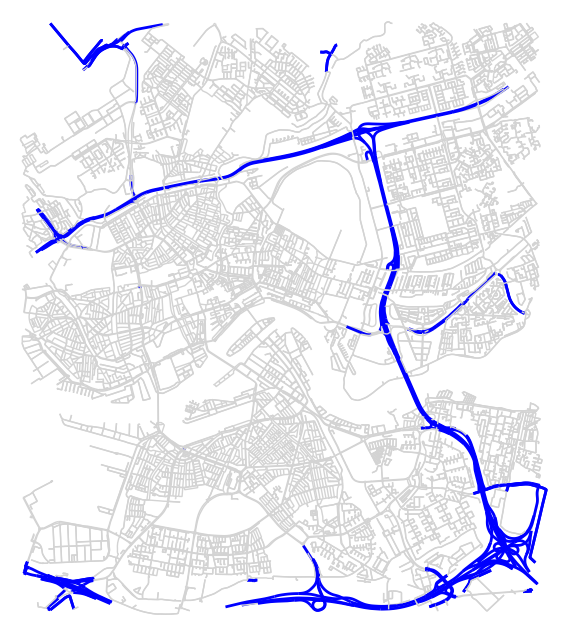

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if isinstance(data.get('maxspeed'), list):
        if  float(data.get('maxspeed')[0]) > 50:
            edge_size.append("blue")
            edge_width.append(2)
        else:
            edge_size.append("lightgray")
            edge_width.append(1)
            
    elif isinstance(data.get('maxspeed'), str):
        if float(data.get('maxspeed')) > 50:
            edge_size.append("blue")
            edge_width.append(2)
        else:
            edge_size.append("lightgray")
            edge_width.append(1)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color="red", node_size=0, edge_linewidth=edge_width, edge_color=edge_size,
                save=False, filepath="high_speed.png"
            )

## Code for random points

In [11]:

import geopandas as gpd
from shapely.geometry import Point

In [7]:

default_neighbourhood_map_file_path = "../../graph/neighbourhood_map_suburb.geojson"

neighbourhood_map = gpd.read_file(default_neighbourhood_map_file_path)

In [9]:

def random_points_in_polygon(polygon, number):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

In [32]:
points_from_map = []
points = []

percentage_out_of_bound = 0.05
lat_min = 51.863171
lat_max = 51.970486
lon_min = 4.427773
lon_max = 4.580918

ten_perc_lat = (lat_max - lat_min) * percentage_out_of_bound
ten_perc_lon = (lon_max - lon_min) * percentage_out_of_bound

num_of_points_per_neighbourhood = 1
for index, row in neighbourhood_map.iterrows():
    fit = True
    while fit:
        point = random_points_in_polygon(row["geometry"], num_of_points_per_neighbourhood)[0]
        if (lat_max - ten_perc_lat > point.y > lat_min + ten_perc_lat) & (
                lon_max - ten_perc_lon > point.x > lon_min + ten_perc_lon):
            points_from_map.append(point)
            fit = False

for point in points_from_map:
    closest_node = None
    closest_distance = math.inf

    for index1, node in graph_test.nodes(data=True):
        distance = math.dist([point.x, point.y], [node.get("x"), node.get("y")])
        if distance < closest_distance:
            closest_distance = distance
            closest_node = index1

    points.append(closest_node)

In [25]:
points_route1 = points

In [27]:
points_route2 = points

In [33]:
points

[44257462,
 44395826,
 44404046,
 44437712,
 44458339,
 4419381298,
 44246938,
 44470829,
 44476443,
 44617582]

In [37]:
route_1_origin = 7395972075
route1_destination = 44481413
route_2_origin = 6248923727
route2_destination = 44470829

In [38]:
path1 = ox.distance.shortest_path(graph_test, route_1_origin, route1_destination, weight='length')
path2 = ox.distance.shortest_path(graph_test, route_2_origin, route2_destination, weight='length')


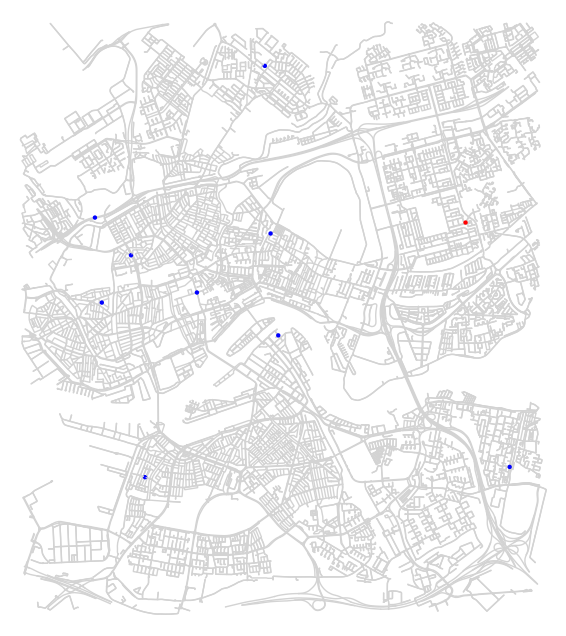

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))
node_color = []
node_size = []
for index, node in graph_test.nodes(data=True):
    if index == 44470829:
            node_color.append("red")
            node_size.append(10)
        
    elif index in points:
            node_color.append("blue")
            node_size.append(10)
    else:
        node_color.append("lightgray")
        node_size.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color=node_color, node_size=node_size, edge_linewidth=1, edge_color="lightgray",
                save=False, filepath="high_speed.png"
            )

In [43]:
# path1 = ox.distance.shortest_path(graph_test, route_1_origin, route1_destination, weight='length')
# path2 = ox.distance.shortest_path(graph_test, route_2_origin, route2_destination, weight='length')

edges_in_path1 = []
for i in range(0, len(path1)-1):
    edges_in_path1.append((path1[i], path1[i+1]))
                          
                          
edges_in_path2 = []
for i in range(0, len(path2)-1):
    edges_in_path1.append((path2[i], path2[i+1]))

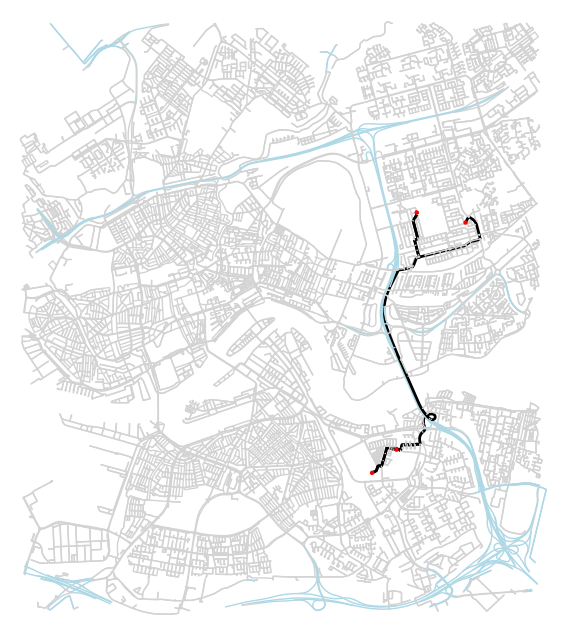

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
edge_size = []
edge_width = []
for road_id, (origin_num, destination_num, data) in enumerate(graph_test.edges(data=True)):
    if (origin_num, destination_num) in edges_in_path1 or (origin_num, destination_num) in edges_in_path2 or (destination_num, origin_num) in edges_in_path1 or (destination_num, origin_num) in edges_in_path2:
            edge_size.append("black")
            edge_width.append(2)
    elif isinstance(data.get('maxspeed'), list):
        if  float(data.get('maxspeed')[0]) > 50:
            edge_size.append("lightblue")
            edge_width.append(1)
        else:
            edge_size.append("lightgray")
            edge_width.append(1)
            
    elif isinstance(data.get('maxspeed'), str):
        if float(data.get('maxspeed')) > 50:
            edge_size.append("lightblue")
            edge_width.append(1)
        else:
            edge_size.append("lightgray")
            edge_width.append(1)
    else:
        edge_size.append("lightgray")
        edge_width.append(1)
        
    
node_color = []
node_size = []    
for index, node in graph_test.nodes(data=True):
    if index == route_1_origin or index == route1_destination or index == route_2_origin or index == route2_destination:
            node_color.append("red")
            node_size.append(10)
    else:
        node_color.append("lightgray")
        node_size.append(1)

ox.plot.plot_graph(
                graph_test, ax=ax,
                bgcolor="white", node_color=node_color, node_size=node_size, edge_linewidth=edge_width, edge_color=edge_size,
                save=True, filepath="example_origin_and_destination.png"
            )